In [1]:
import h5py
import matplotlib.pyplot as plt
import os
import numpy as np
# File path to your HDF5 file
# file_path = r'C:\Experiments\lyman29\BaF_Fluorescence\2025\02\14\0009\2025-02-14_0009_BaF_Fluorescence_0_rep00017.h5'
folder_path = r'C:\Users\PolyEDM\labscript-suite\userlib\analysislib\lyman29\background_730-39\0W'

In [33]:
images = []
count=0

for filename in os.listdir(folder_path):
    count+=1
    file_path = os.path.join(folder_path, filename)
    if file_path.endswith('.h5'):
        with h5py.File(file_path, 'r') as file:
            images.append(file['images/camera/fluorescence/frame'][:])
    if count>300:
        break

In [34]:
images = np.array(images)
images.shape

(300, 512, 512)

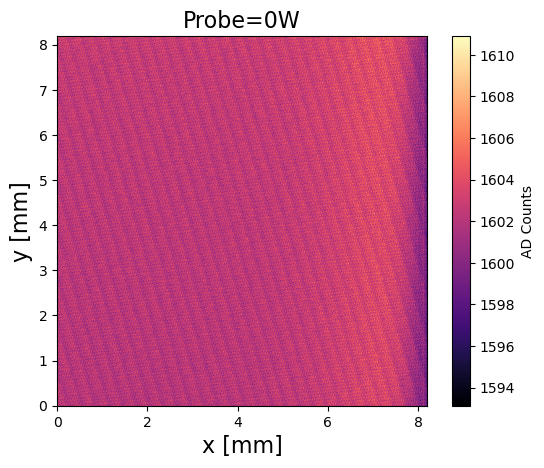

In [36]:
plt.imshow(np.mean(images, axis =0))
pixel_size = 16e-3  # [mm]
plt.imshow(np.mean(images, axis =0), extent=[0, 512 * pixel_size, 0, 512 * pixel_size], cmap='magma')
plt.xlabel('x [mm]', fontsize=16)
plt.ylabel('y [mm]', fontsize=16)
plt.title('Probe=0W', fontsize=16)
plt.colorbar(label='AD Counts')

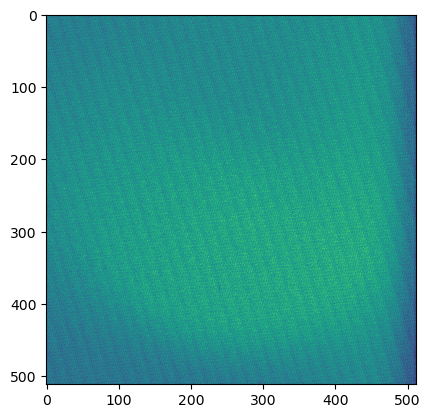

In [21]:
plt.imshow(np.mean(images, axis =0))
pixel_size = 16e-3  # [mm]
plt.imshow(np.mean(images, axis =0), extent=[0, 512 * pixel_size, 0, 512 * pixel_size], cmap='magma')
plt.xlabel('x [mm]', fontsize=16)
plt.ylabel('y [mm]', fontsize=16)
plt.colorbar(label='Intensity')

In [2]:
#Params. There should be a way to store this efficiently in h5 file
#analog output 
tstart = 0
tend = 12e-3
#YAG
tYAG = 2e-3
#Nuvu
tEMCCD = tYAG+0.1e-3
trigger_duration=20e-3

## Generate plot from a single hdf5 file

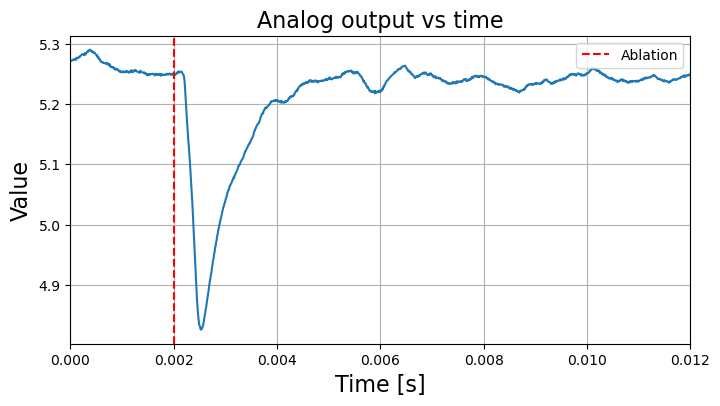

In [3]:
# Open the HDF5 file
with h5py.File(file_path, 'r') as file:
    # Navigate to the desired group: 'data/traces/BaF X-B Absorption'
    group = file['data/traces/BaF X-B Absorption']
    time_array=[]
    value_array=[]
    # List the data inside the group
    for item in group:
        time_array.append(item[0])
        value_array.append(item[1])

# print(time_array)
# Create the plot
plt.figure(figsize=(8, 4))
plt.plot(time_array, value_array)
plt.axvline(x=tYAG, color='r', linestyle='--', label='Ablation')

# Set the labels and title with font size 16
plt.xlabel('Time [s]', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.xlim([tstart, tend])
plt.title('Analog output vs time', fontsize=16)

# Optionally, show the grid
plt.grid(True)

# Show the plot
plt.legend()
plt.show()

(512, 512)
<class 'numpy.ndarray'>


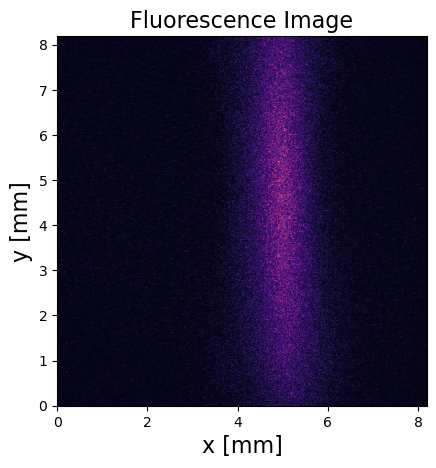

In [4]:
with h5py.File(file_path, 'r') as file:
    image_data = file['images/camera/fluorescence/frame'][:]
# print(image_data)
print(image_data.shape)
print(type(image_data))
pixel_size=16e-3 #[mm]
# # Visualize the image (assuming it is a 2D matrix)
# image_data[:, :200] = 0 
# image_data[:, 400:] = 0 

plt.imshow(image_data, extent=[0, 512*pixel_size, 0, 512*pixel_size], cmap='magma')
plt.title('Fluorescence Image', fontsize=16)
plt.xlabel('x [mm]', fontsize=16)
plt.ylabel('y [mm]', fontsize=16)
plt.show()

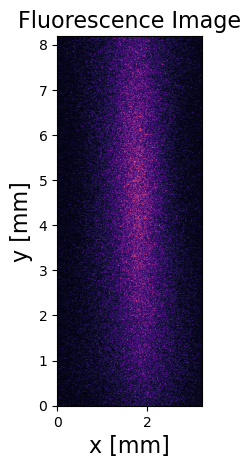

In [6]:
with h5py.File(file_path, 'r') as file:
    image_data = file['images/camera/fluorescence/frame'][:]
# print(image_data)
pixel_size=16e-3 #[mm]

# Set region of interest
cropped_image = image_data[:, 200:400]

plt.imshow(cropped_image, extent=[0, cropped_image.shape[1]*pixel_size, 0, cropped_image.shape[0]*pixel_size], cmap='magma')
plt.title('Fluorescence Image', fontsize=16)
plt.xlabel('x [mm]', fontsize=16)
plt.ylabel('y [mm]', fontsize=16)
plt.show()

1626.66556930542
52.42960440246288


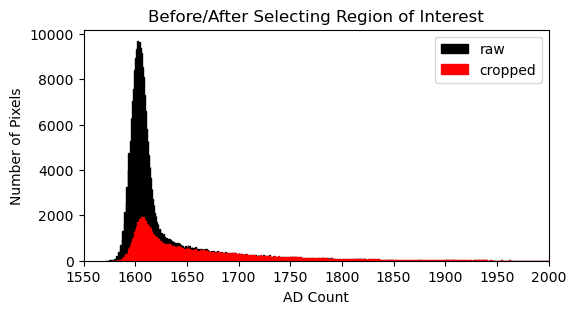

In [13]:
hist, bin_edges = np.histogram(image_data, bins=1000)  # Adjust the number of bins as needed
hist_a, bin_edges_a = np.histogram(cropped_image, bins=1000)  # Adjust the number of bins as needed

# Plot the histogram using plt.bar (faster than plt.hist)
plt.figure(figsize=(6, 3))
plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), edgecolor="black", color='black', align='edge', label='raw')
plt.bar(bin_edges_a[:-1], hist_a, width=np.diff(bin_edges_a), edgecolor="red", color='red', align='edge', label='cropped')

# Add title and labels
plt.title('Before/After Selecting Region of Interest')
plt.xlabel('AD Count')
plt.ylabel('Number of Pixels')
plt.xlim([1550, 2000])
plt.legend()
print(np.mean(image_data))
print(np.std(image_data))

## Crop and average 300 images in a folder
Note that region of interest may change for each shot!

In [ ]:
images = np.array(images)

In [1]:
images = []
count=0

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if re.match(r"2025-\d{2}\-\d{2}\_\d{4}\_BaF_Fluorescence_0_rep\d{5}\.h5$", filename):
        with h5py.File(file_path, 'r') as file:
            if 'images/camera/fluorescence/frame' in file:
                count=+1
                image_data_nuvu = file['images/camera/fluorescence/frame'][:]
                images.append(file['images/camera/fluorescence/frame'][:])
            if count>300:
                break
                
                
# # Plot the data with error bars representing the standard deviation
# plt.figure(figsize=(6, 3))
# plt.errorbar(np.arange(len(mean_array_nuvu)), mean_array_nuvu, yerr=std_array_nuvu, fmt='o', label='Data with std', color='blue', capsize=5)
# plt.title('Multiple Nuvu Measurements with Standard Deviation (Error Bars)')
# plt.xlabel('Measurement #', fontsize=16)
# plt.ylim([1500,1800])
# plt.ylabel('Data', fontsize=16)
# # Show the plot
# plt.show()


# Create a figure and two subplots (1 row, 2 columns)
plt.figure(figsize=(12, 5))

# First subplot (top-left)
plt.subplot(1, 2, 1)  # (rows, cols, position)
plt.errorbar(np.arange(len(mean_array_nuvu)), mean_array_nuvu, yerr=std_array_nuvu, fmt='o', label='Data with std', color='blue', capsize=5)
plt.title('Multiple Nuvu Measurements with Standard Deviation')
plt.xlabel('Measurement #', fontsize=16)
plt.ylim([1500,1800])
plt.ylabel('Data', fontsize=16)
plt.legend()

# Second subplot (top-right)
plt.subplot(1, 2, 2)  # (rows, cols, position)
plt.errorbar(np.arange(len(mean_array_analog)), mean_array_analog, yerr=std_array_analog, fmt='o', label='Data with std', color='blue', capsize=5)
plt.title('Multiple Analog Measurements with Standard Deviation')
plt.xlabel('Measurement #', fontsize=16)
plt.ylim([5,5.5])
plt.ylabel('Data', fontsize=16)
plt.legend()

# Show the plots
plt.tight_layout()  # Automatically adjusts subplot params for better spacing
plt.show()


NameError: name 'os' is not defined